# Visualizing Linear Relationships and Correlation

**Abid Ali**

Email: [abdsoftfsd@gmail.com](mailto:abdsoftfsd@gmail.com)

Skype: abd.soft

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, spearmanr
import seaborn as sns


In [3]:
bikesharing_data = pd.read_csv('data/bike_sharing_daily.csv', index_col=0)
bikesharing_data.head()


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
bikesharing_data.shape


(731, 15)

In [5]:
bikesharing_data.columns


Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [6]:
bikesharing_data['dteday'] = pd.DatetimeIndex(bikesharing_data['dteday'])
bikesharing_data['dteday'].head()


instant
1   2011-01-01
2   2011-01-02
3   2011-01-03
4   2011-01-04
5   2011-01-05
Name: dteday, dtype: datetime64[ns]

In [8]:
bikesharing_data.dtypes


dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [11]:
pd.DatetimeIndex(bikesharing_data['dteday'])


DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq=None)

In [28]:
# Correlation Coefficient
np.corrcoef(bikesharing_data['temp'], bikesharing_data['cnt'])


array([[1.        , 0.62749401],
       [0.62749401, 1.        ]])

<AxesSubplot:>

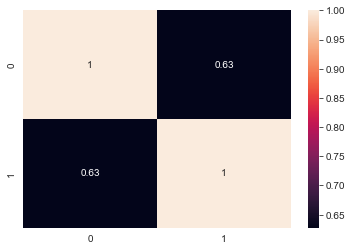

In [15]:
sns.heatmap(np.corrcoef(bikesharing_data['temp'], bikesharing_data['cnt']), annot=True)

In [33]:
bikesharing_data['temp'].corr(bikesharing_data['cnt'])


0.6274940090334918

In [35]:
# evaluates the linear relationship between two continuous variables
pearsonr(bikesharing_data['temp'], bikesharing_data['cnt'])

(0.627494009033492, 2.8106223975907754e-81)

In [36]:
# based on the **ranks** of the variables rather than actual raw values - usually used with ordinal data
spearmanr(bikesharing_data['temp'], bikesharing_data['cnt'])


SpearmanrResult(correlation=0.6220344732276183, pvalue=1.674554642260452e-79)

Text(0, 0.5, 'Count')

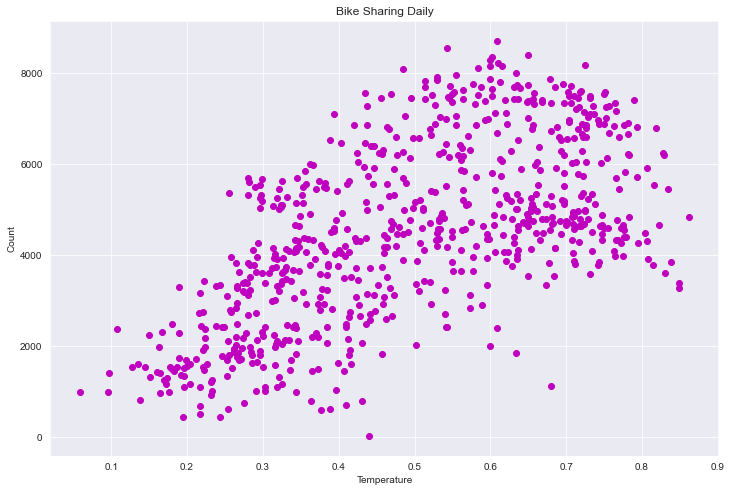

In [37]:
plt.figure(figsize=(12, 8))

plt.scatter(
    x=bikesharing_data['temp'],
    y=bikesharing_data['cnt'], color='m'
)
plt.title('Bike Sharing Daily')

plt.xlabel('Temperature')
plt.ylabel('Count')


In [38]:
np.corrcoef(
    bikesharing_data['workingday'],
    bikesharing_data['registered']
)


array([[1.        , 0.30390712],
       [0.30390712, 1.        ]])

In [40]:
bikesharing_data['workingday'].corr(bikesharing_data['registered'])

0.3039071170459171

In [42]:
pearsonr(bikesharing_data['workingday'],
         bikesharing_data['registered'])

(0.30390711704591733, 4.3815710893705565e-17)

In [43]:
spearmanr(bikesharing_data['workingday'],
          bikesharing_data['registered'])


SpearmanrResult(correlation=0.3058584564758216, pvalue=2.6994118569378256e-17)

Text(0, 0.5, 'Count of registered users')

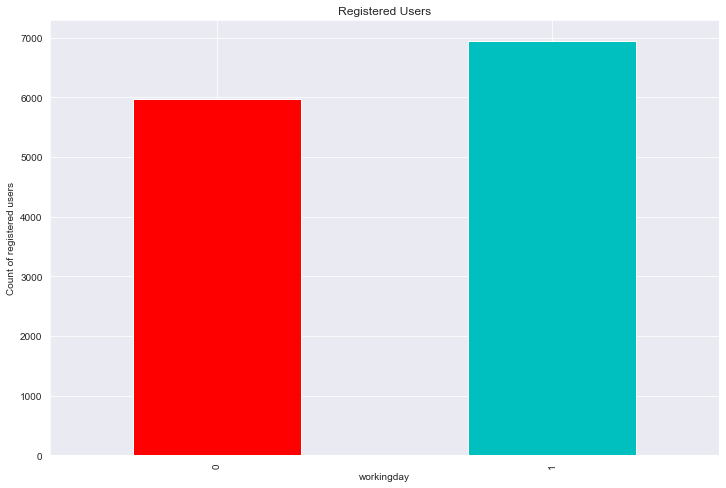

In [49]:
ax = plt.subplot()

bikesharing_data.groupby('workingday').max()['registered'].plot(kind='bar',
                                                                figsize=(12, 8),
                                                                ax = ax,
                                                                color=['r', 'c'])
plt.title('Registered Users')
plt.ylabel('Count of registered users')

Text(0, 0.5, 'Count of Casual Users')

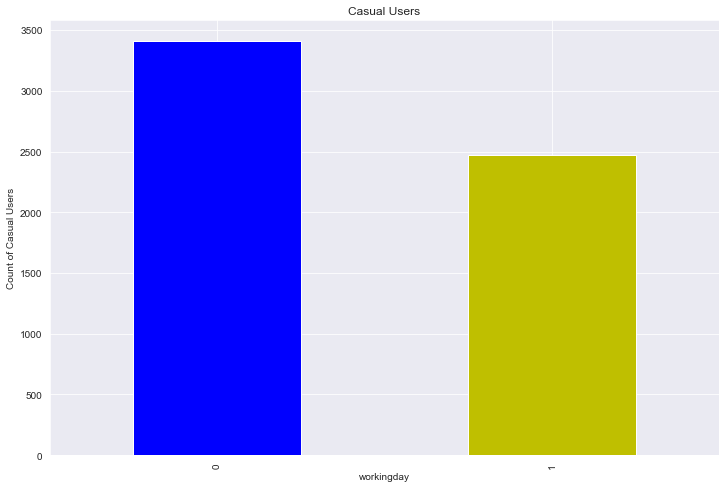

In [50]:
ax = plt.subplot()

bikesharing_data.groupby('workingday').max()['casual'].plot(kind='bar',
                                                            figsize=(12, 8),
                                                            ax=ax,
                                                            color=['b', 'y'])
plt.title('Casual Users')
plt.ylabel('Count of Casual Users')


In [51]:
np.corrcoef(bikesharing_data['windspeed'], bikesharing_data['cnt'])


array([[ 1.      , -0.234545],
       [-0.234545,  1.      ]])

In [52]:
bikesharing_data['windspeed'].corr(bikesharing_data['cnt'])


-0.23454499742167

In [53]:
pearsonr(bikesharing_data['windspeed'], bikesharing_data['cnt'])


(-0.23454499742167, 1.3599586778869642e-10)

In [55]:
spearmanr(bikesharing_data['windspeed'], bikesharing_data['cnt'])

SpearmanrResult(correlation=-0.21719701027268842, pvalue=2.9694272867448183e-09)

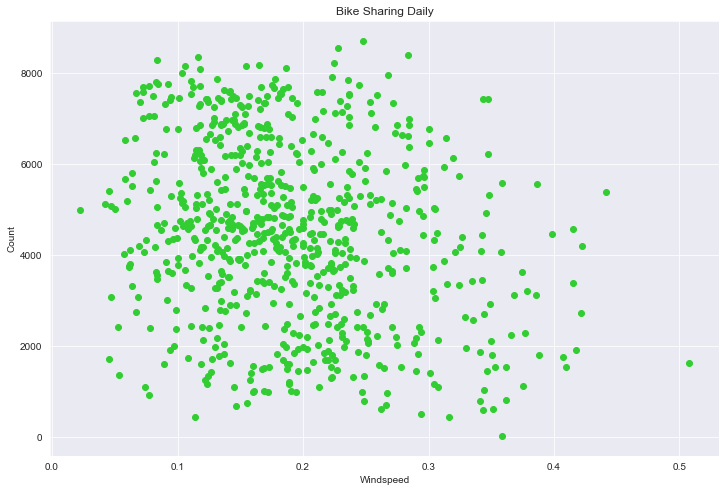

In [56]:
plt.figure(figsize=(12, 8))

plt.scatter(x=bikesharing_data['windspeed'],
            y=bikesharing_data['cnt'], color='limegreen')

plt.title('Bike Sharing Daily')
plt.xlabel('Windspeed')
plt.ylabel('Count')

plt.show()


In [58]:
corr_data = bikesharing_data.corr()
corr_data


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659


<AxesSubplot:>

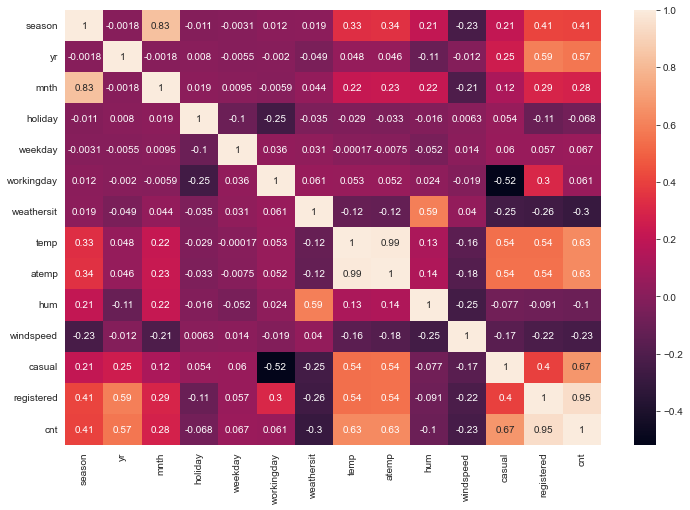

In [60]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_data, annot=True)


In [62]:
# !pip install yellowbrick

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [68]:
target = bikesharing_data['cnt']
features = bikesharing_data.drop(['casual', 'registered', 'cnt', 'dteday'], axis=1)


In [69]:
from yellowbrick.target import FeatureCorrelation

feature_names = list(features.columns)

feature_names


['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed']

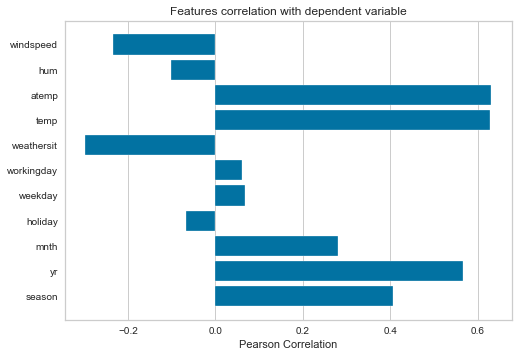

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [70]:
visualizer = FeatureCorrelation(labels=feature_names)

visualizer.fit(features, target)
visualizer.poof()
